In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('/content/orders1.csv')

In [3]:
# Displaying the first few rows of the dataframe
print(df.head())

   order_id  customer_id  order_date  product_id  \
0     88525            2   5/28/2012       60101   
1     88522            3  07-07-2010       98221   
2     88523            3   7/27/2011       98221   
3     88523            3   7/27/2011       98221   
4     88523            3   7/27/2011       98221   

                                     product_name  product_price  quantity  
0                                        Avery 49           2.88         2  
1  SANFORD Liquid Accent™ Tank-Style Highlighters           2.84         4  
2                                      Xerox 1968           6.68         7  
3        Acme® Preferred Stainless Steel Scissors           5.68         7  
4                                             V70         205.99         8  


In [4]:
# Getting the summary statistics of numerical columns
print(df.describe())

           order_id  customer_id    product_id  product_price   quantity
count     50.000000     50.00000     50.000000      50.000000  50.000000
mean   83821.280000     12.90000  48462.580000      45.696400  13.640000
std    16049.222111      6.18837  35086.959437      86.803946  15.308741
min     9895.000000      2.00000   2724.000000       1.760000   1.000000
25%    86839.250000      6.25000  11787.000000       5.722500   4.000000
50%    88525.500000     15.00000  57388.500000      11.630000   9.000000
75%    90039.000000     18.00000  68005.000000      41.220000  16.750000
max    90200.000000     21.00000  98221.000000     500.980000  71.000000


In [5]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       50 non-null     int64  
 1   customer_id    50 non-null     int64  
 2   order_date     50 non-null     object 
 3   product_id     50 non-null     int64  
 4   product_name   50 non-null     object 
 5   product_price  50 non-null     float64
 6   quantity       50 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.9+ KB
None


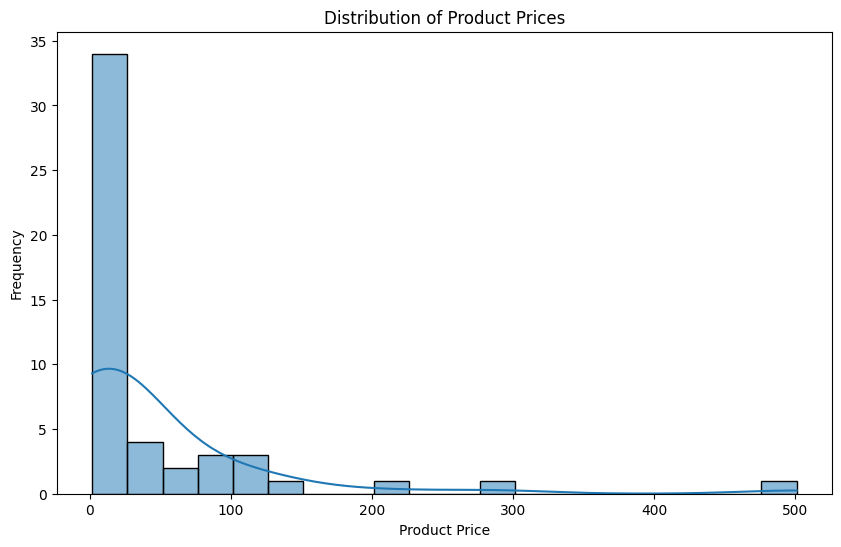

In [6]:
# Explore the distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['product_price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

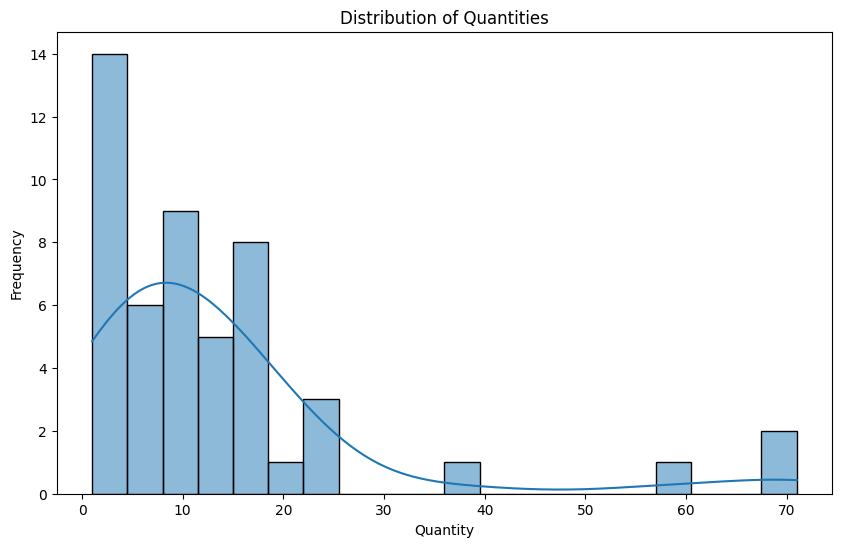

In [7]:
# Explore the distribution of quantities
plt.figure(figsize=(10, 6))
sns.histplot(df['quantity'], bins=20, kde=True)
plt.title('Distribution of Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

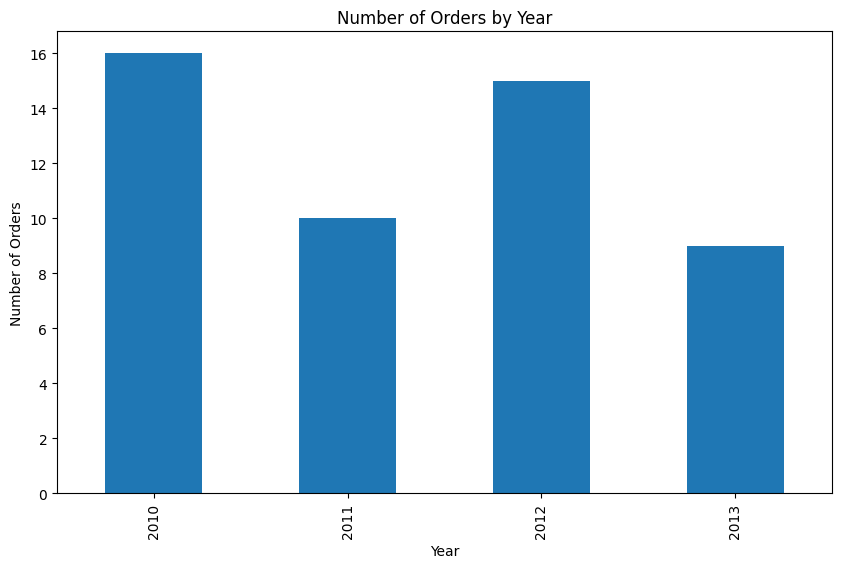

In [8]:
# Explore the distribution of order dates
df['order_date'] = pd.to_datetime(df['order_date']) # Convert order_date to datetime format
plt.figure(figsize=(10, 6))
df['order_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()

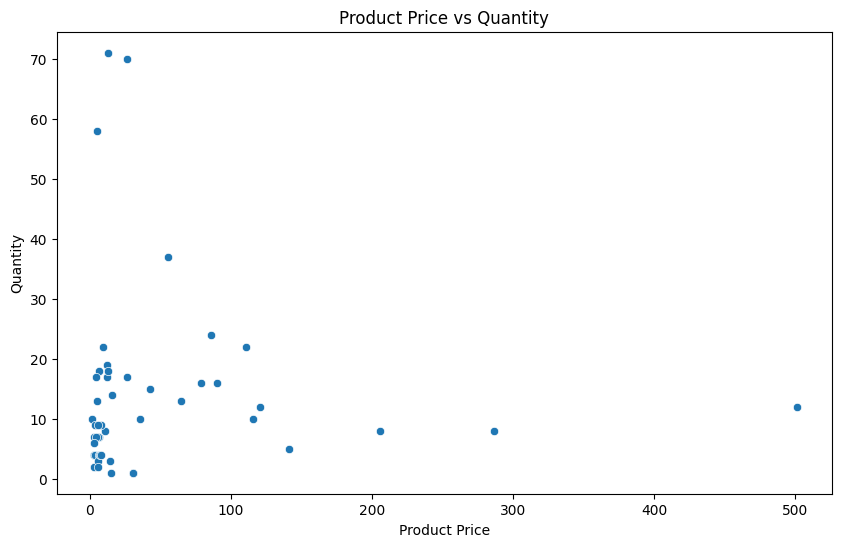

In [9]:
# Explore the relationship between product price and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_price', y='quantity', data=df)
plt.title('Product Price vs Quantity')
plt.xlabel('Product Price')
plt.ylabel('Quantity')
plt.show()

**1. Compute the total revenue generated by the online store for each month in the dataset.**

In [10]:
# Calculate revenue for each order
df['revenue'] = df['quantity'] * df['product_price']

# Aggregate revenue by month
revenue_by_month = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()

# Display total revenue generated by the online store for each month
print(revenue_by_month)

order_date
2010-02    1177.78
2010-04      30.94
2010-05    5418.71
2010-07      11.36
2010-08     208.56
2010-12    6011.76
2011-03      30.98
2011-04      64.35
2011-05    1443.84
2011-07    1734.44
2011-10     217.98
2011-11    2052.76
2011-12      17.60
2012-02      87.84
2012-04      49.02
2012-05    1695.14
2012-10     233.32
2012-12    5171.66
2013-01      67.53
2013-02      42.81
2013-03      30.98
2013-05      90.92
2013-07    1451.64
2013-10    2654.57
Freq: M, Name: revenue, dtype: float64


**2. Compute the total revenue generated by each product in the dataset.**

In [12]:
# Calculating the revenue for each order
df['total_revenue'] = df['quantity'] * df['product_price']

# Aggregate revenue by product
revenue_by_product = df.groupby('product_name')['total_revenue'].sum().sort_values(ascending=False)

# Displaying total revenue generated by each product
print(revenue_by_product)

product_name
Global Troy™ Executive Leather Low-Back Tilter                                                       6011.76
Office Star Flex Back Scooter Chair with White Frame                                                 2441.56
DAX Natural Wood-Tone Poster Frame                                                                   2303.76
Riverside Furniture Stanwyck Manor Table Series                                                      2294.80
Accessory34                                                                                          2063.76
Xerox 194                                                                                            2052.76
V70                                                                                                  1647.92
Canon S750 Color Inkjet Printer                                                                      1451.64
Kensington 6 Outlet MasterPiece® HOMEOFFICE Power Control Center                                     1443.84
Howard

**3.Compute the total revenue generated by each customer in the dataset**

In [13]:
# Calculate revenue for each order
df['total_revenue'] = df['quantity'] * df['product_price']

# Aggregate revenue by customer
revenue_by_customer = df.groupby('customer_id')['total_revenue'].sum().sort_values(ascending=False)

# Display total revenue generated by each customer
print(revenue_by_customer)

customer_id
5     6128.40
3     5250.20
18    3886.79
6     3615.80
21    3149.52
9     2294.80
14    1335.36
16    1220.59
20     886.66
8      704.90
15     493.41
19     233.82
7      233.32
10     217.98
11     208.56
12      87.84
17      42.78
2        5.76
Name: total_revenue, dtype: float64


**4. Identify the top 10 customers by revenue generated.**

In [14]:
# Calculate revenue for each order
df['total_revenue'] = df['quantity'] * df['product_price']

# Aggregate revenue by customer
revenue_by_customer = df.groupby('customer_id')['total_revenue'].sum().sort_values(ascending=False)

# Select top 10 customers by revenue
top_10_customers = revenue_by_customer.head(10)

# Display top 10 customers by revenue
print(top_10_customers)

customer_id
5     6128.40
3     5250.20
18    3886.79
6     3615.80
21    3149.52
9     2294.80
14    1335.36
16    1220.59
20     886.66
8      704.90
Name: total_revenue, dtype: float64
